# Data Wrangling

In [1]:
import pandas as pd

df = pd.read_csv("Customer Purchase.csv")

print(df.head())

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Purchase"] = df["Purchase"].map({"YES": 1, "NO": 0})

print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

   Gender  Monthly Income  Brand Awareness  Quality Rating Purchase
0    Male           28000                1               2       NO
1  Female           30000                2               3       NO
2    Male           32000                2               2       NO
3  Female           35000                3               3       NO
4    Male           37000                3               4      YES

Missing Values:
 Gender             0
Monthly Income     0
Brand Awareness    0
Quality Rating     0
Purchase           0
dtype: int64

Basic Statistics:
           Gender  Monthly Income  Brand Awareness  Quality Rating   Purchase
count  80.000000       80.000000        80.000000       80.000000  80.000000
mean    0.500000    51787.500000         4.025000        4.225000   0.800000
std     0.503155    13156.019703         1.211496        1.030853   0.402524
min     0.000000    28000.000000         1.000000        1.000000   0.000000
25%     0.000000    40750.000000         3.000000  

# Data Visualization

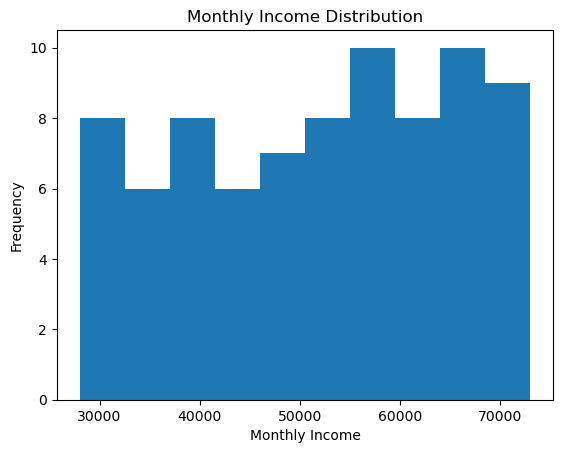

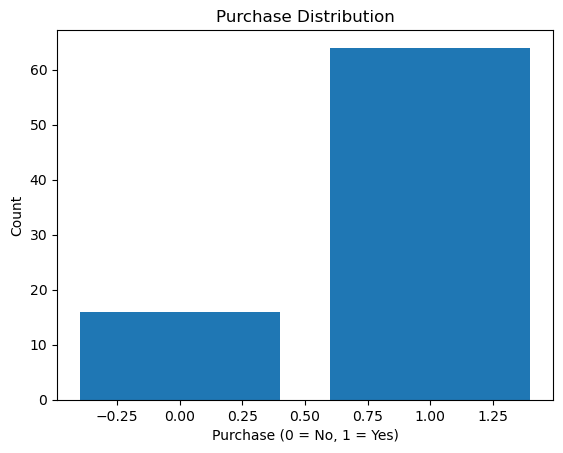

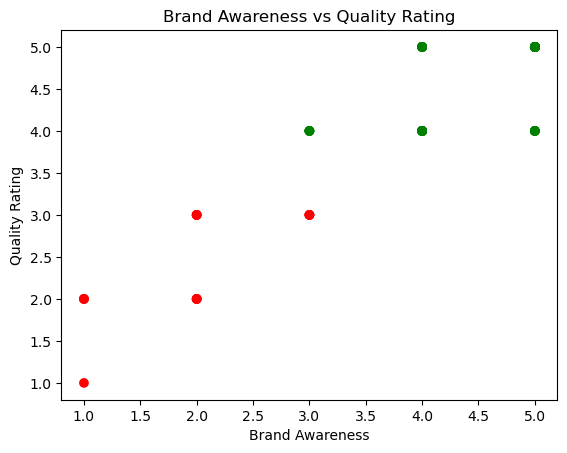

In [2]:
import matplotlib.pyplot as plt

plt.hist(df["Monthly Income"], bins=10)
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Monthly Income Distribution")
plt.show()

purchase_counts = df["Purchase"].value_counts()
plt.bar(purchase_counts.index, purchase_counts.values)
plt.xlabel("Purchase (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Purchase Distribution")
plt.show()

colors = df["Purchase"].map({1: "green", 0: "red"})
plt.scatter(df["Brand Awareness"], df["Quality Rating"], c=colors)
plt.xlabel("Brand Awareness")
plt.ylabel("Quality Rating")
plt.title("Brand Awareness vs Quality Rating")
plt.show()

# Logistic Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("Purchase", axis=1)
y = df["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9375

Confusion Matrix:
 [[ 2  0]
 [ 1 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.93      0.96        14

    accuracy                           0.94        16
   macro avg       0.83      0.96      0.88        16
weighted avg       0.96      0.94      0.94        16



## Interpretation 

* Logistic Regression predicts customer purchase probability.

* Accuracy shows overall correctness.

* Confusion matrix explains correct vs incorrect predictions.

* Precision and recall indicate how well the model handles YES/NO purchases.

# Decision Tree

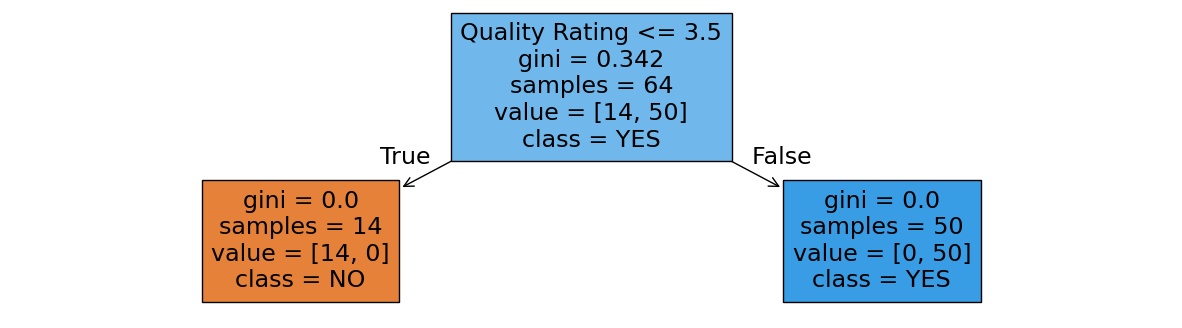

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(15, 4))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["NO", "YES"],
    filled=True
)
plt.show()

## Auto score

In [6]:
from sklearn.model_selection import cross_val_score
 
scores = cross_val_score(dt, X, y, cv=5)
print("Auto CV Scores:", scores)
print("Average Auto Score:", scores.mean())

Auto CV Scores: [1. 1. 1. 1. 1.]
Average Auto Score: 1.0


### Node Identification
* Root node: Quality Rating ≤ 3.5 (first split of the tree)

* Internal nodes: None, as the root directly splits into leaf nodes
* Leaf nodes:
    + Quality Rating ≤ 3.5 → Purchase = NO
    + Quality Rating > 3.5 → Purchase = YES

### IF-THEN Rules from tree
* IF Quality Rating ≤ 3.5 THEN Purchase = NO

* IF Quality Rating > 3.5 THEN Purchase = YES

### Reflection Questions
**1. Why is Decision Tree more interpretable than Logistic Regression?**

* Decision Trees provide visual IF–THEN rules that are easy to understand, whereas Logistic Regression relies on mathematical coefficients that are harder to interpret.

**2. Which model would you recommend to a business manager and why?**

* Decision Tree, because it is simple to explain, transparent, and supports rule-based decision making.

**3. What happens if decision tree depth increases too much?**

* The model overfits the data, performs poorly on new data, and loses generalization ability.